In [1]:
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from utils.generators import DataGenerator_FCN
from global_config import global_config
from utils.units import dbz_mm
from utils.visualizers import rainfall_shade

In [2]:
config = {
        'DEVICE': torch.device('cuda:0'),
        'IN_LEN': 5,
        'OUT_LEN': 18,
        'BATCH_SIZE': 2,
    }

In [3]:
data_gen = DataGenerator_FCN(global_config['DATA_PATH'], 1, 
        2, config['IN_LEN'], config['OUT_LEN'], config['IN_LEN'] + config['OUT_LEN'], config=config)

In [30]:
train_data, train_label, train_label_cat = data_gen.get_train(1321)

In [31]:
data = train_data.detach().cpu().numpy()
label = train_label.detach().cpu().numpy()
label_cat = train_label_cat.detach().cpu().numpy()

In [32]:
data.shape, label.shape

((2, 5, 1120, 853), (2, 18, 1120, 853))

In [33]:
np.max(dbz_mm(data[1,0,0]))

-5.9604645e-08

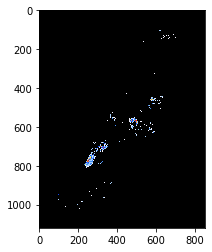

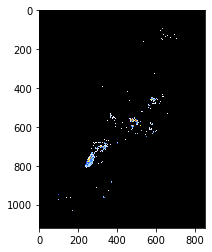

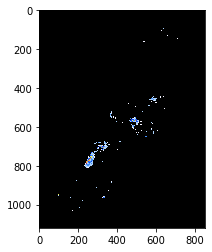

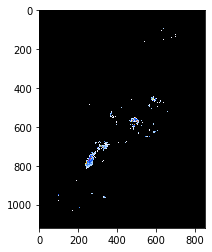

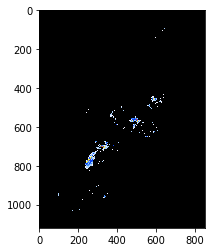

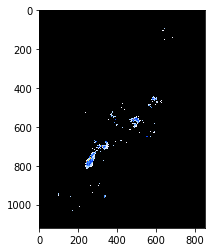

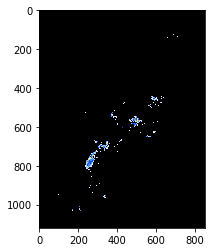

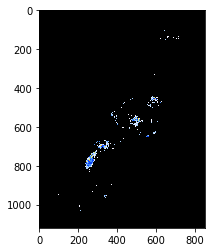

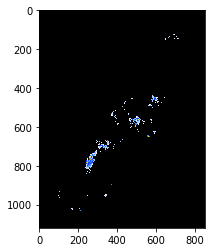

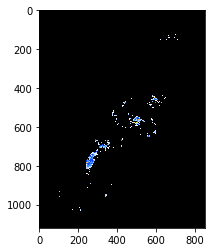

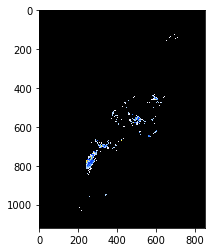

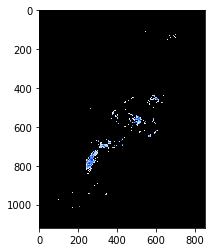

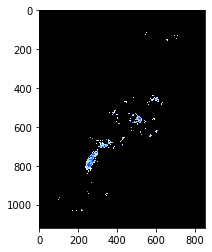

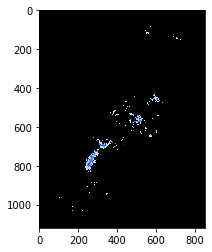

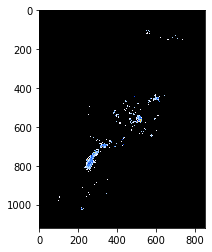

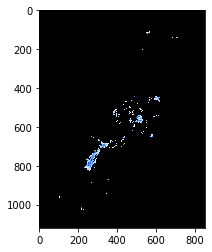

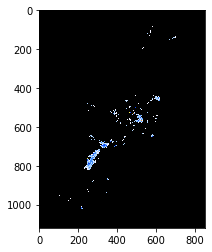

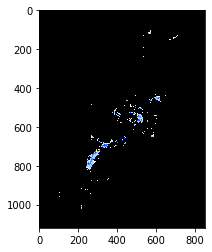

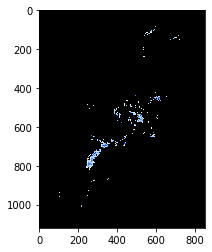

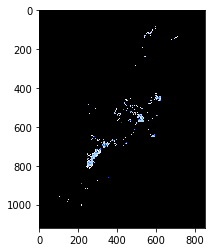

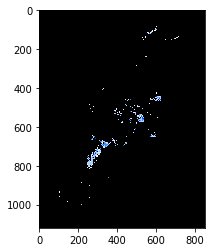

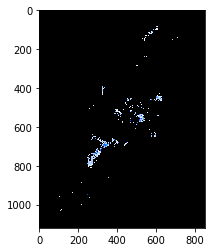

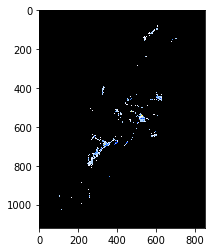

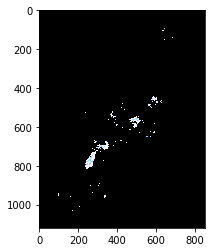

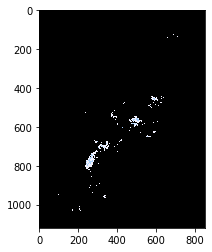

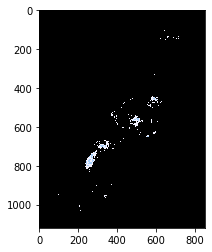

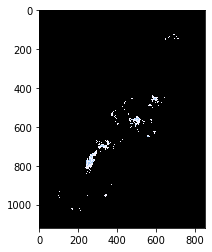

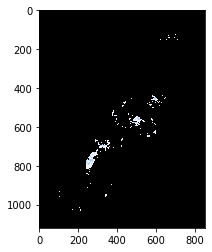

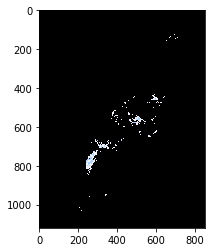

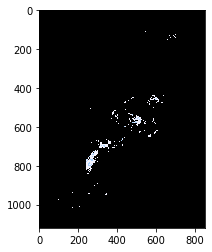

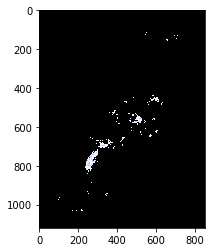

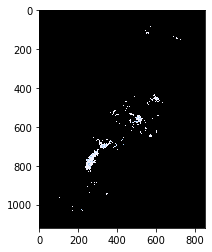

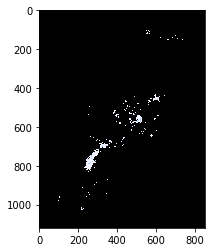

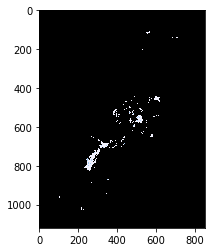

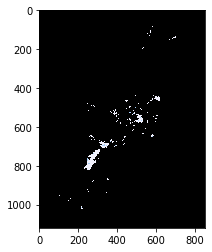

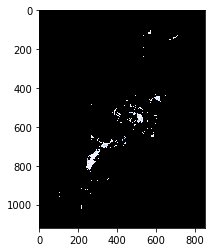

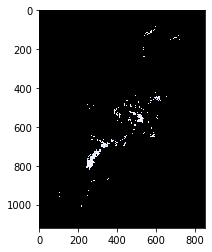

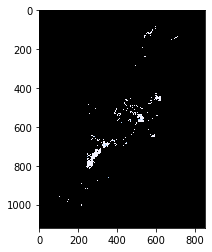

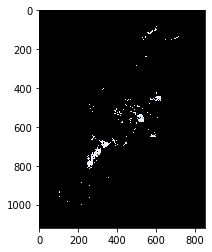

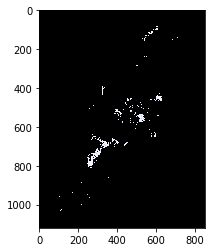

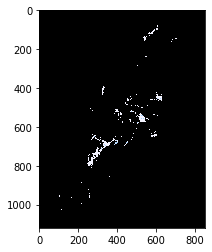

In [34]:
for i in range(5):
    plt.imshow(rainfall_shade(dbz_mm(data[0, i])), cmap='gray')
    plt.show()
for i in range(18):
    plt.imshow(rainfall_shade(dbz_mm(label[0, i])), cmap='gray')
    plt.show()
for i in range(18):
    plt.imshow(rainfall_shade(label_cat[0, i]), cmap='gray')
    plt.show()

In [35]:
y = np.zeros(4)
for j in range(2):
    x = []
    for i in range(4):
        x.append(np.sum(label_cat[0, j] == i))
    y += 1/np.array(x)

In [36]:
np.array(y/y.min(),dtype=np.int)

array([   1,  137,  839, 5521])